# Taller #25: Filtro de Kalman e Inferencia de Variables Ocultas
#### Desarrollado por: David Santiago Cruz Hernández

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# pip install -r requirements.txt

---

# Filtro de Kalman en 1D

## 1. Generamos datos sintéticos

In [48]:
np.random.seed(42)

### Parámetros para datos sintéticos

In [49]:
n_timesteps = 100
process_noise_std = 1.0  # Ruido de proceso (w)
measurement_noise_std = 5.0  # Ruido de medición (v)

### Generar la señal verdadera (caminata aleatoria)

In [50]:
true_signal = np.zeros(n_timesteps)
for k in range(1, n_timesteps):
    true_signal[k] = true_signal[k-1] + np.random.normal(0, process_noise_std)

### Generar observaciones ruidosas

In [51]:
observations = true_signal + np.random.normal(0, measurement_noise_std, size=n_timesteps)

### Introducir observaciones faltantes (20% faltante)

In [52]:
n_missing = int(0.2 * n_timesteps)
missing_indices = np.random.choice(n_timesteps, size=n_missing, replace=False)
observations[missing_indices] = np.nan

## 2. Aplicar Filtro de Kalman

### Implementación del filtro de Kalman (1D)

*  **Ecuación de estado:** $$x_k = x_{k-1} + w_k, \ \ \   w_k \ \  \epsilon \ \ N(0, q)$$

*  **Ecuación de medición:** $$z_k = x_k + v_k, \ \ \   v_k \ \  \epsilon \ \ N(0, r)$$

In [53]:
q = process_noise_std**2
r = measurement_noise_std**2

x_est = np.zeros(n_timesteps)  # Estimaciones estatales
P = np.zeros(n_timesteps)      # Estimar la covarianza

### Inicializar estado

In [54]:
x_est[0] = 0.0
P[0] = 1.0  # Covarianza inicial

### Aplicar el filtro

In [55]:
for k in range(1, n_timesteps):
    # Predecir el paso
    x_pred = x_est[k-1]
    P_pred = P[k-1] + q

    # Paso de actualización (solo si hay observación)
    if not np.isnan(observations[k]):
        K = P_pred / (P_pred + r)  # Ganancia de Kalman
        x_est[k] = x_pred + K * (observations[k] - x_pred)
        P[k] = (1 - K) * P_pred
    else:
        # Sin observación, omitir actualización
        x_est[k] = x_pred
        P[k] = P_pred

## 3. Visualización

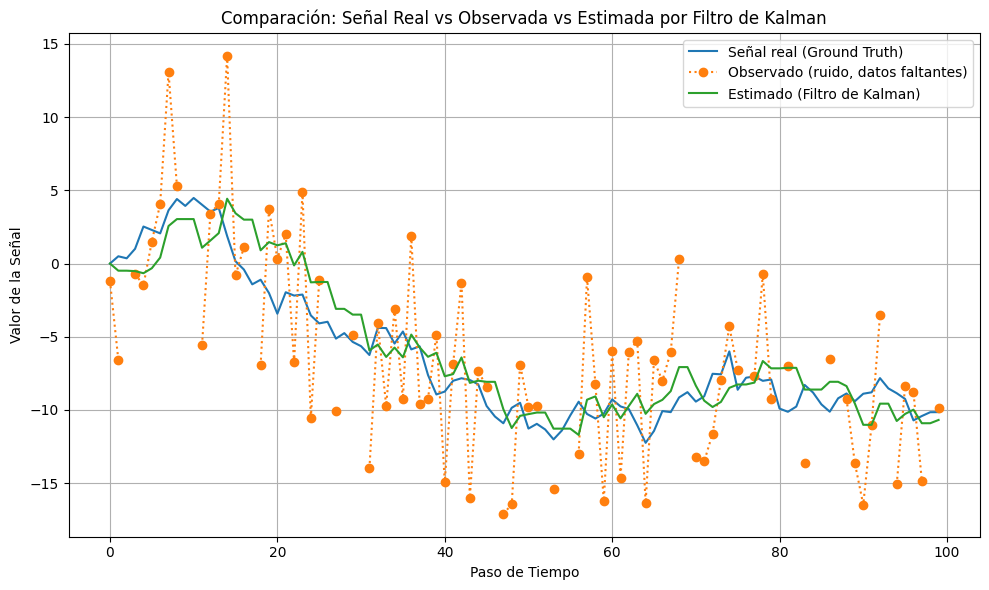

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(true_signal, label='Señal real (Ground Truth)')
plt.plot(observations, label='Observado (Ruido, datos faltantes)', linestyle='dotted', marker='o')
plt.plot(x_est, label='Estimado (Filtro de Kalman)')
plt.title('Comparación: Señal Real vs Observada vs Estimada por Filtro de Kalman')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Valor de la Señal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

# Filtro de Kalman en 2D

## 1. Generamos datos sintéticos

In [66]:
np.random.seed(50)

### Parámetros para datos sintéticos

In [58]:
n_timesteps = 100
process_noise_std = 1.0  # Desviación estándar del ruido de proceso
measurement_noise_std = 4.0  # Desviación estándar del ruido de medición

### Generar señal real 2D (Caminata aleatoría en el plano)

In [59]:
true_signal = np.zeros((n_timesteps, 2))
for k in range(1, n_timesteps):
    step = np.random.normal(0, process_noise_std, size=2)
    true_signal[k] = true_signal[k - 1] + step

### Generar observaciones ruidosas en 2D

In [60]:
observations = true_signal + np.random.normal(0, measurement_noise_std, size=(n_timesteps, 2))

### Introducir observaciones faltantes (30% faltante)

In [61]:
n_missing = int(0.3 * n_timesteps)
missing_indices = np.random.choice(n_timesteps, size=n_missing, replace=False)
observations[missing_indices] = np.nan

## 2. Aplicar Filtro de Kalman

### Implementación del filtro de Kalman (2D)

*  **Ecuación de estado:**

$$
  \mathbf{x}_k \;=\;
    \mathbf{F}\,\mathbf{x}_{\,k-1} \;+\; \mathbf{w}_k,
  \quad
  \mathbf{w}_k \sim \mathcal{N}(\mathbf{0},\,\mathbf{Q}).
$$

para el caso más básico de solo posición (random walk), se elige:

$$
  \mathbf{F} \;=\;
  \begin{bmatrix}
    1 & 0 \\[6pt]
    0 & 1
  \end{bmatrix}
  = \mathbf{I}_2,
  \qquad
  \mathbf{Q} \;=\;
  \begin{bmatrix}
    q & 0 \\[6pt]
    0 & q
  \end{bmatrix}.
$$
<br>
<br>
*  **Ecuación de medición:**

$$
  \mathbf{z}_k \;=\;
    \mathbf{H}\,\mathbf{x}_k \;+\; \mathbf{v}_k,
  \quad
  \mathbf{v}_k \sim \mathcal{N}(\mathbf{0},\,\mathbf{R}).
$$

Si medimos directamente \(x\) e \(y\) con ruido aditivo:

$$
  \mathbf{H} \;=\;
  \begin{bmatrix}
    1 & 0 \\[6pt]
    0 & 1
  \end{bmatrix}
  = \mathbf{I}_2,
  \qquad
  \mathbf{R} \;=\;
  \begin{bmatrix}
    r & 0 \\[6pt]
    0 & r
  \end{bmatrix}.
$$


In [62]:
# Matrices de covarianza
Q = np.eye(2) * (process_noise_std**2)       # Covarianza del proceso
R = np.eye(2) * (measurement_noise_std**2)   # Covarianza de la medición

# Inicializar estimaciones y covarianzas
x_est = np.zeros((n_timesteps, 2))  # Estado estimado
P = np.zeros((n_timesteps, 2, 2))   # Covarianza estimada

### Inicializar estado

In [63]:
x_est[0] = np.array([0.0, 0.0])
P[0] = np.eye(2)

### Aplicar el filtro

In [64]:
# Filtro de Kalman 2D (modelo random walk)
for k in range(1, n_timesteps):
    # Paso de predicción
    x_pred = x_est[k - 1]
    P_pred = P[k - 1] + Q

    # Actualización si la observación no es NaN
    if not np.any(np.isnan(observations[k])):
        K = P_pred @ np.linalg.inv(P_pred + R)  # Ganancia de Kalman
        x_est[k] = x_pred + K @ (observations[k] - x_pred)
        P[k] = (np.eye(2) - K) @ P_pred
    else:
        x_est[k] = x_pred
        P[k] = P_pred

## 3. Visualización en el plano 2D

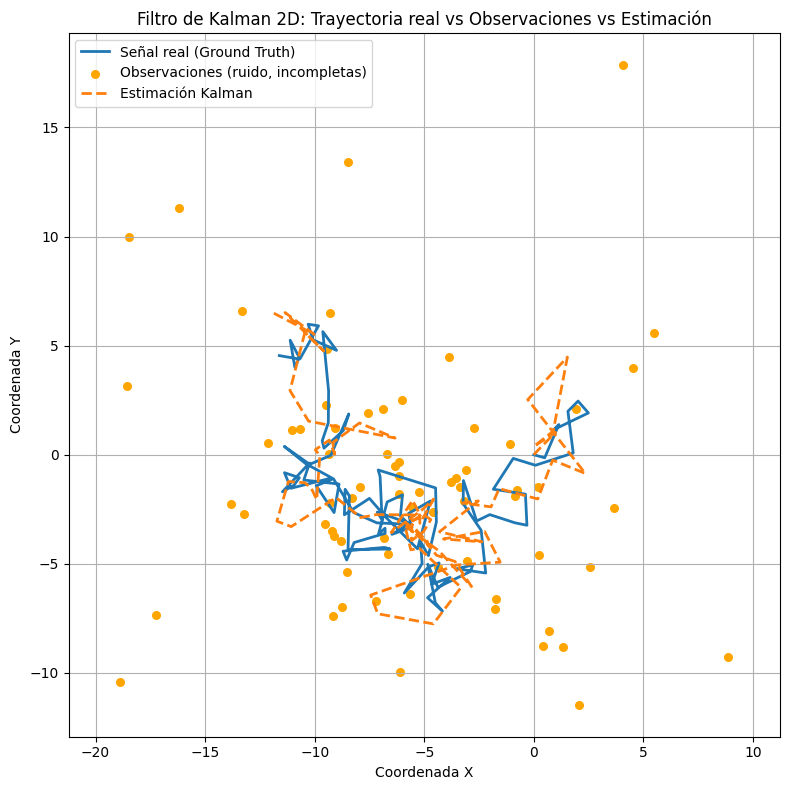

In [65]:
plt.figure(figsize=(8, 8))
plt.plot(true_signal[:, 0], true_signal[:, 1], label='Señal real (Ground Truth)', linewidth=2)
plt.scatter(observations[:, 0], observations[:, 1], label='Observaciones (ruido, incompletas)',
            c='orange', s=30, marker='o')
plt.plot(x_est[:, 0], x_est[:, 1], label='Estimación Kalman', linewidth=2, linestyle='--')
plt.title('Filtro de Kalman 2D: Trayectoria real vs Observaciones vs Estimación')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

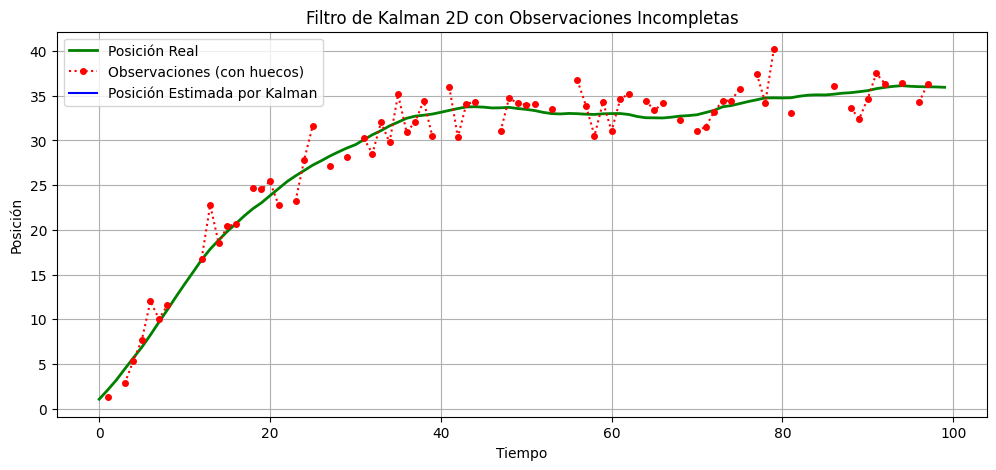

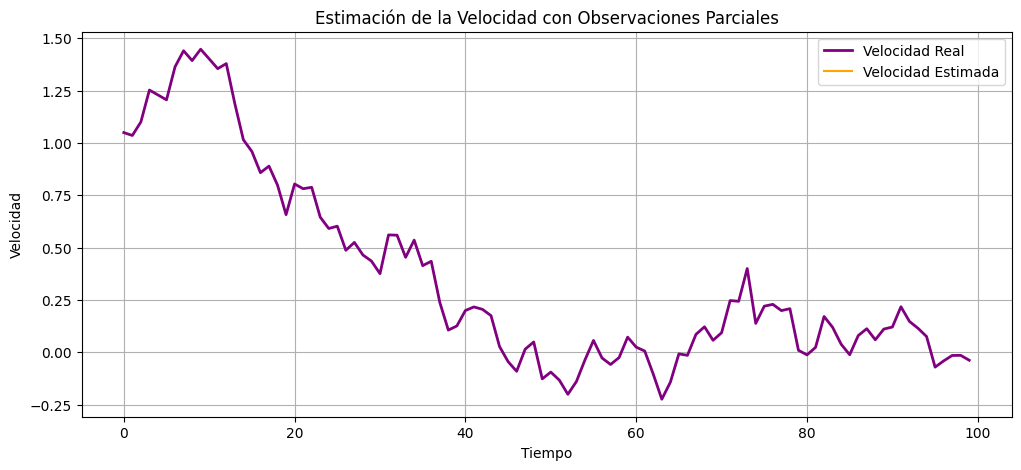

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Semilla para reproducibilidad
np.random.seed(42)

# Paso 1: Generar la señal real (posición y velocidad)
n_timesteps = 100
dt = 1.0

true_position = []
true_velocity = []
pos = 0.0
vel = 1.0

for _ in range(n_timesteps):
    vel += np.random.randn() * 0.1
    pos += vel * dt
    true_position.append(pos)
    true_velocity.append(vel)

true_state = np.vstack((true_position, true_velocity)).T

# Paso 2: Crear observaciones con ruido
observation_noise_std = 2.0
observations = true_state[:, 0] + np.random.randn(n_timesteps) * observation_noise_std

# Paso 3: Simular observaciones incompletas (30% de valores perdidos)
missing_indices = np.random.choice(n_timesteps, size=int(n_timesteps * 0.3), replace=False)
observations_with_gaps = observations.copy()
observations_with_gaps[missing_indices] = np.nan  # valor no observado

# Paso 4: Configurar el filtro de Kalman
kf = KalmanFilter(
    transition_matrices = [[1, dt],
                           [0, 1]],
    observation_matrices = [[1, 0]],
    initial_state_mean = [0, 0],
    initial_state_covariance = np.eye(2),
    transition_covariance = np.array([[1, 0.1],
                                      [0.1, 1]]) * 0.05,
    observation_covariance = observation_noise_std**2
)

# Paso 5: Aplicar el filtro (pykalman maneja automáticamente los NaN)
state_means, _ = kf.filter(observations_with_gaps)

# Paso 6: Gráfica de posición
plt.figure(figsize=(12, 5))
plt.plot(true_state[:, 0], label='Posición Real', color='green', linewidth=2)
plt.plot(observations_with_gaps, label='Observaciones (con huecos)', color='red', linestyle='dotted', marker='o', markersize=4)
plt.plot(state_means[:, 0], label='Posición Estimada por Kalman', color='blue')
plt.title('Filtro de Kalman 2D con Observaciones Incompletas')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()
plt.grid(True)
plt.show()

# Paso 7: Gráfica de velocidad
plt.figure(figsize=(12, 5))
plt.plot(true_state[:, 1], label='Velocidad Real', color='purple', linewidth=2)
plt.plot(state_means[:, 1], label='Velocidad Estimada', color='orange')
plt.title('Estimación de la Velocidad con Observaciones Parciales')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.legend()
plt.grid(True)
plt.show()


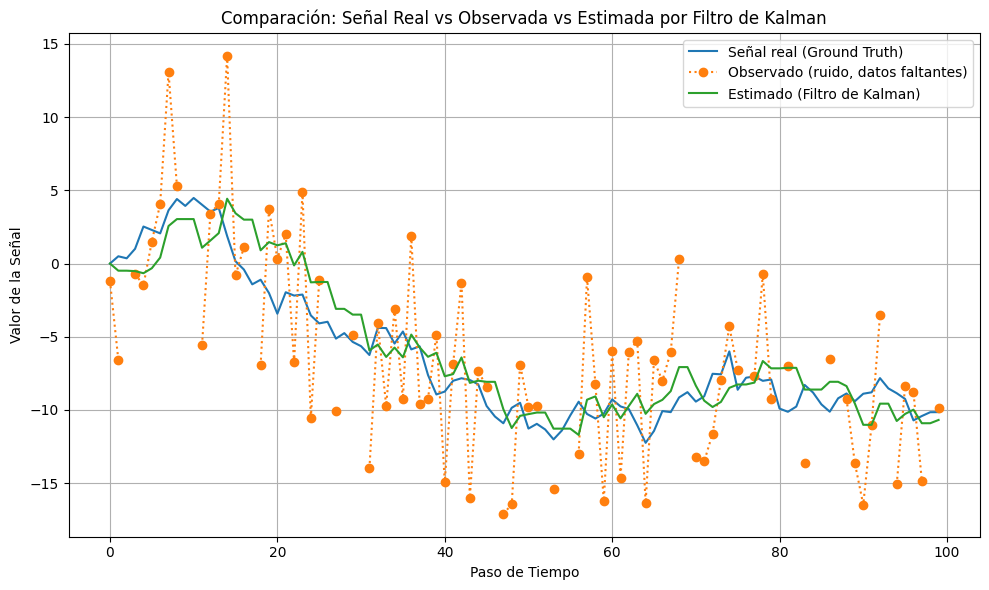

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# Parameters for synthetic data
n_timesteps = 100
process_noise_std = 1.0  # Process noise (w)
measurement_noise_std = 5.0  # Measurement noise (v)

# Generate the true signal (random walk)
true_signal = np.zeros(n_timesteps)
for k in range(1, n_timesteps):
    true_signal[k] = true_signal[k-1] + np.random.normal(0, process_noise_std)

# Generate noisy observations
observations = true_signal + np.random.normal(0, measurement_noise_std, size=n_timesteps)

# Introduce missing observations (20% missing)
n_missing = int(0.2 * n_timesteps)
missing_indices = np.random.choice(n_timesteps, size=n_missing, replace=False)
observations[missing_indices] = np.nan

# Kalman Filter Implementation (1D)
# State equation: x_k = x_{k-1} + w_k,  w_k ~ N(0, q)
# Measurement equation: z_k = x_k + v_k,  v_k ~ N(0, r)
q = process_noise_std**2
r = measurement_noise_std**2

x_est = np.zeros(n_timesteps)  # State estimates
P = np.zeros(n_timesteps)      # Estimate covariance

# Initialize state
x_est[0] = 0.0
P[0] = 1.0  # Initial covariance

for k in range(1, n_timesteps):
    # Predict step
    x_pred = x_est[k-1]
    P_pred = P[k-1] + q

    # Update step (only if observation is present)
    if not np.isnan(observations[k]):
        K = P_pred / (P_pred + r)  # Kalman gain
        x_est[k] = x_pred + K * (observations[k] - x_pred)
        P[k] = (1 - K) * P_pred
    else:
        # No observation, skip update
        x_est[k] = x_pred
        P[k] = P_pred

# Plotting all three signals in one graph
plt.figure(figsize=(10, 6))
plt.plot(true_signal, label='Señal real (Ground Truth)')
plt.plot(observations, label='Observado (ruido, datos faltantes)', linestyle='dotted', marker='o')
plt.plot(x_est, label='Estimado (Filtro de Kalman)')
plt.title('Comparación: Señal Real vs Observada vs Estimada por Filtro de Kalman')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Valor de la Señal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


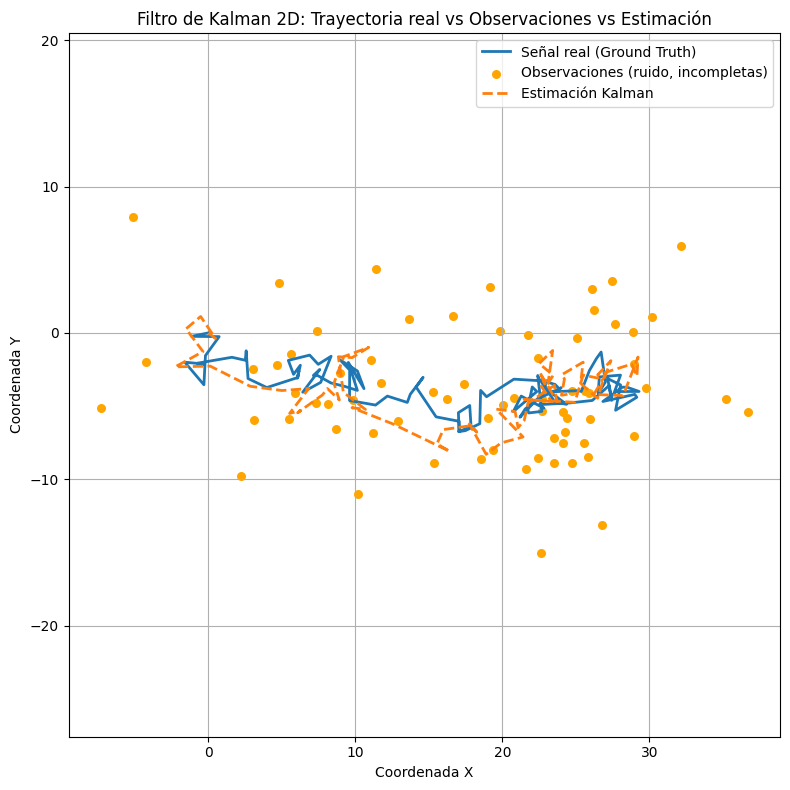

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
#np.random.seed(42)

# Parámetros
n_timesteps = 100
process_noise_std = 1.0  # Desviación estándar del ruido de proceso
measurement_noise_std = 4.0  # Desviación estándar del ruido de medición

# Generar señal real 2D (random walk en el plano)
true_signal = np.zeros((n_timesteps, 2))
for k in range(1, n_timesteps):
    step = np.random.normal(0, process_noise_std, size=2)
    true_signal[k] = true_signal[k - 1] + step

# Generar observaciones ruidosas 2D
observations = true_signal + np.random.normal(0, measurement_noise_std, size=(n_timesteps, 2))

# Introducir datos faltantes (30% de missing)
n_missing = int(0.3 * n_timesteps)
missing_indices = np.random.choice(n_timesteps, size=n_missing, replace=False)
observations[missing_indices] = np.nan

# Matrices de covarianza
Q = np.eye(2) * (process_noise_std**2)       # Covarianza del proceso
R = np.eye(2) * (measurement_noise_std**2)   # Covarianza de la medición

# Inicializar estimaciones y covarianzas
x_est = np.zeros((n_timesteps, 2))  # Estado estimado
P = np.zeros((n_timesteps, 2, 2))   # Covarianza estimada

# Condición inicial
x_est[0] = np.array([0.0, 0.0])
P[0] = np.eye(2)

# Filtro de Kalman 2D (modelo random walk)
for k in range(1, n_timesteps):
    # Paso de predicción
    x_pred = x_est[k - 1]
    P_pred = P[k - 1] + Q

    # Actualización si la observación no es NaN
    if not np.any(np.isnan(observations[k])):
        K = P_pred @ np.linalg.inv(P_pred + R)  # Ganancia de Kalman
        x_est[k] = x_pred + K @ (observations[k] - x_pred)
        P[k] = (np.eye(2) - K) @ P_pred
    else:
        x_est[k] = x_pred
        P[k] = P_pred

# Graficar trayectorias en 2D
plt.figure(figsize=(8, 8))
plt.plot(true_signal[:, 0], true_signal[:, 1], label='Señal real (Ground Truth)', linewidth=2)
plt.scatter(observations[:, 0], observations[:, 1], label='Observaciones (ruido, incompletas)',
            c='orange', s=30, marker='o')
plt.plot(x_est[:, 0], x_est[:, 1], label='Estimación Kalman', linewidth=2, linestyle='--')
plt.title('Filtro de Kalman 2D: Trayectoria real vs Observaciones vs Estimación')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()
